Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

Read csv File

In [ ]:
df=pd.read_csv('ToyotaCorolla.csv')

In [ ]:
df.keys()

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [ ]:
# df.info()

 Selecting the relevant columns

In [ ]:
df = df[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

In [ ]:
df.shape

(1436, 9)

In [ ]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
print(df["Price"])

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64


In [ ]:
print(df['Price'].max())
print(df['Price'].min())

32500
4350


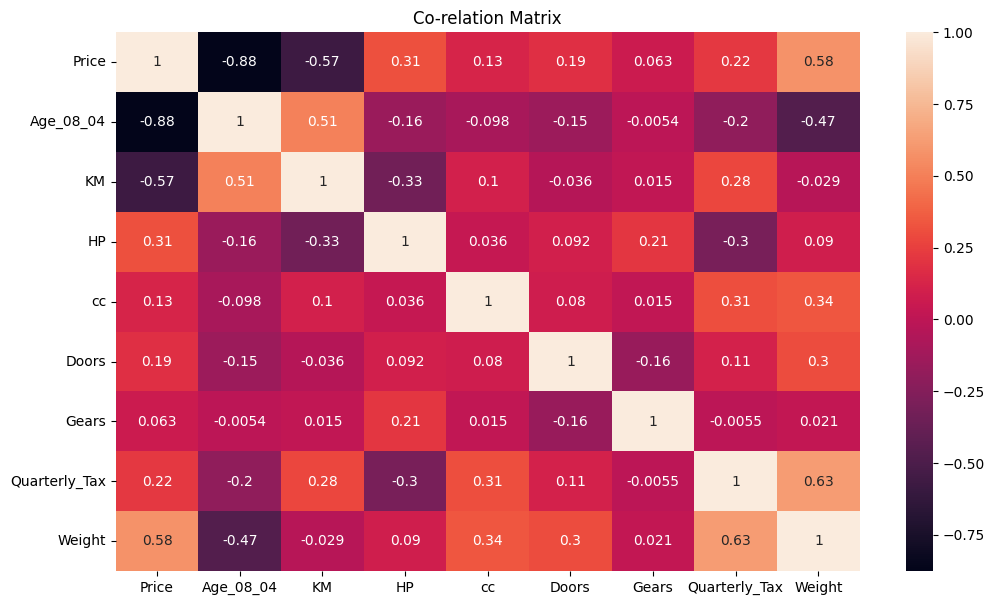

In [ ]:
import seaborn as sns
corr_results = df.corr()
fig = plt.figure(figsize = (12,7))

sns.heatmap(corr_results,annot = True)
plt.title('Co-relation Matrix')
plt.show()

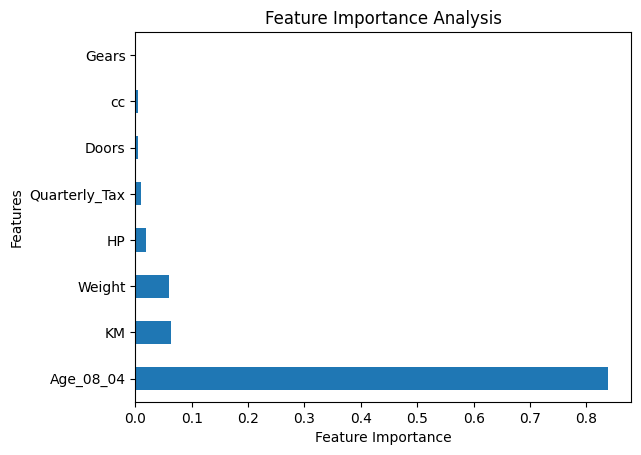

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Load the data
X = df[["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

# Drop any rows with missing values
X = X.dropna()

# Separate the target variable (QoE_Score) and ensure alignment with X
y = df.loc[X.index, 'Price']

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importances
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(len(X.columns))  # Plot all features, or adjust the number
   .plot(kind='barh'))

# Show the plot
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

In [ ]:
# df = df[["Price", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

In [ ]:
# import matplotlib.pyplot as plt

# # Create box plots for each column
# df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,9))

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.show()

In [ ]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Splitting the data into features (X) and target (y)

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X.shape

(1436, 8)

In [ ]:
len(X)

1436

In [ ]:
y

array([13500, 13750, 13950, ...,  8500,  7250,  6950])

 Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077,)
Shape of y_test: (359,)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[11372.36615311, 10800.        ],
       [ 8955.14888862,  9950.        ],
       [ 9528.21510669,  7500.        ],
       [ 8989.39260139,  9250.        ],
       [10028.06634815,  9750.        ],
       [ 7801.23894664,  9950.        ],
       [ 8811.52659355,  9895.        ],
       [ 8332.43952766,  6750.        ],
       [14173.18461838, 13450.        ],
       [13220.99992018, 12950.        ],
       [ 9362.10537728,  9900.        ],
       [ 9389.38696975,  9750.        ],
       [13039.41200313, 13500.        ],
       [13161.75131656, 11500.        ],
       [ 9770.38483855,  8950.        ],
       [ 8302.13007256,  8950.        ],
       [12364.26480942, 11500.        ],
       [17399.69007405, 16950.        ],
       [ 7271.96926252,  8250.        ],
       [ 9231.01631342,  6999.        ],
       [12855.60774966, 11495.        ],
       [17818.92569264, 19500.        ],
       [ 7911.6025945 ,  7950.        ],
       [10554.85098484, 10750.        ],
       [ 7422.37

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Accuracy
mse = mean_squared_error(y_test, y_pred)
accuracy = 1 - mse / y_test.var()
print('Accuracy: ', accuracy)

Mean Absolute Error (MAE): 1019.39
Mean Squared Error (MSE): 1965831.34
Root Mean Squared Error (RMSE): 1402.08
R-squared (R²): 0.86
Accuracy:  0.8614722799605136


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initializing and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred1 = model.predict(X_test)

In [ ]:
np.concatenate((y_pred1.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[10125.2 , 10800.  ],
       [ 9609.5 ,  9950.  ],
       [ 8726.02,  7500.  ],
       [ 7998.35,  9250.  ],
       [ 9568.85,  9750.  ],
       [ 7858.05,  9950.  ],
       [ 8791.75,  9895.  ],
       [ 8424.5 ,  6750.  ],
       [12592.4 , 13450.  ],
       [13493.65, 12950.  ],
       [10110.25,  9900.  ],
       [ 9307.45,  9750.  ],
       [12414.9 , 13500.  ],
       [11464.75, 11500.  ],
       [ 9809.8 ,  8950.  ],
       [ 8818.5 ,  8950.  ],
       [11289.  , 11500.  ],
       [17900.5 , 16950.  ],
       [ 7581.2 ,  8250.  ],
       [ 8301.74,  6999.  ],
       [11992.  , 11495.  ],
       [18644.75, 19500.  ],
       [ 7727.5 ,  7950.  ],
       [10110.  , 10750.  ],
       [ 7413.55,  8950.  ],
       [17755.45, 16895.  ],
       [10514.95, 10950.  ],
       [ 7616.05,  7950.  ],
       [16528.  , 15950.  ],
       [13030.65, 12950.  ],
       [ 8301.5 ,  7950.  ],
       [ 9273.5 ,  9450.  ],
       [ 7952.3 ,  7400.  ],
       [ 9249.5 ,  9450.  ],
       [ 9026.

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R-squared
r2 = r2_score(y_test, y_pred1)
print(f"R-squared (R²): {r2:.2f}")

# Accuracy
mse = mean_squared_error(y_test, y_pred1)
accuracy = 1 - mse / y_test.var()
print('Accuracy: ', accuracy)

NameError: name 'np' is not defined